<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import numpy as np
np.__version__


'1.19.5'

In [4]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [8]:
import warnings
warnings.simplefilter("ignore")

In [26]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

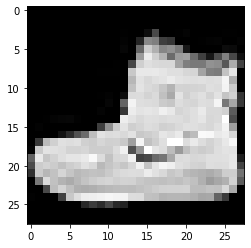

In [27]:
# first_image = mnist.train.images[0]
first_image = training_images[0]
first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
import matplotlib.pyplot as plt
plt.imshow(pixels, cmap='gray')

In [30]:
# import PIL.Image as pil
# first_image = training_images[0].reshape(28,28)
# img = pil.fromarray(np.uint8(first_image * 255) , 'L')
# img.show()

In [10]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(
                                            128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(
                                            10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network
  
**Flatten**: Remember earlier where our images were a square when
you printed them out? Flatten just takes that square and turns it
into a 1-dimensional set.
  
**Dense**: Adds a layer of neurons
  
Each layer of neurons needs an **activation function** to tell them what to
do. There are lots of options, but just use these for now. 
  
**Relu** effectively means "If X>0 return X, else return 0" -- so what it does
 it only passes values 0 or greater to the next layer in the network.
  
**Softmax** takes a set of values, and effectively picks the biggest one, so,
 for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1,
 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for
 the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- 
 The goal is to save a lot of coding!
  
The next thing to do, now the model is defined, is to actually build it.
You do this by compiling it with an optimizer and loss function as before -- 
and then you train it by calling **model.fit ** asking it to fit your training
data to your training labels -- i.e. have it figure out the relationship between
the training data and its actual labels, so in future, if you have data that
looks like the training data, then it can make a prediction for what that data
would look like.

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4962 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3764 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3377 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3145 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2956 - accuracy: 0.8912


Once it's done training -- you should see an accuracy value at the end of the
final epoch. It might look something like 0.9098. This tells you that your
neural network is about 91% accurate in classifying the training data. I.E.,
it figured out a pattern match between the image and the labels that worked
91% of the time. Not great, but not bad considering it was only trained for 5
epochs and done quite quickly.
  
But how would it work with unseen data? That's why we have the test images. We 
can call model.evaluate, and pass in the two sets, and it will report back the
loss for each. Let's give it a try:

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8705


[0.3607393801212311, 0.8705000281333923]

For me, that returned an accuracy of about .8838, which means it was 
about 88% accurate. As expected it probably would not do as well with *unseen*
data as it did with data it was trained on!

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
example_img_as_input = test_images[0]
example_img_as_input = (np.expand_dims(example_img_as_input,0))
model.predict(example_img_as_input)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [35]:
test_labels[0]

9

In [36]:
example_img_as_input = test_images[1]
example_img_as_input = (np.expand_dims(example_img_as_input,0))
model.predict(example_img_as_input)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
test_labels[1]

2

Labels
Each training and test example is assigned to one of the following labels:
```
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```


In [17]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    